In [2]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [3]:
def HeaderMaker(PatientFile):
    df_cleaned = pd.read_csv(PatientFile, header=None)

    df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
    df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
    df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
    df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
    df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
    df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
    df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
    df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
    df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
    df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})
    
    return df_cleaned

def CalculateTurning(df):
    turningcounter = 0
    growing = True
    previousi = 0
    for num, i in enumerate(df['humerus_r_x']):
        if i > previousi and growing == False:
            turningcounter += 1
            growing = True
        if i < previousi and growing:
            turningcounter += 1
            growing = False
        previousi = i
        if num == 1:
            turningcounter = 0
    return turningcounter

In [8]:
datc = '/datc/ortho/Cleaning/step3/bravo/'
data = {'cat':[],
       'turn':[]}
for i in listdir(datc):
    df = HeaderMaker(datc + i)
    data['cat'].append(i.split('_')[0])
    data['turn'].append(CalculateTurning(df))
#     break
df2 = pd.DataFrame.from_dict(data)
df2.groupby(['cat']).mean()

,turn
cat,
Cat1,19.722222
Cat2,25.314050
Cat3,20.675439
Cat4,9.250000


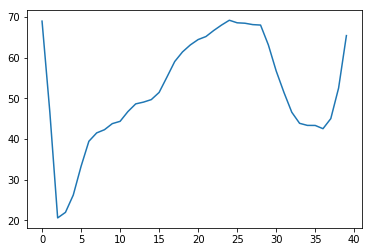

In [12]:
plt.plot(df['humerus_r_x'])
plt.show()

In [19]:
turningcounter = 0
growing = True
previousi = 0
for num, i in enumerate(df['humerus_r_x']):
    if i > previousi and growing == False:
        turningcounter += 1
        growing = True
    if i < previousi and growing:
        turningcounter += 1
        growing = False
    previousi = i
    if num == 1:
        turningcounter = 0
print(turningcounter)

3
